In [1]:
import pandas as pd, os, shutil, seaborn as sns, matplotlib.pyplot as plt

In [2]:
# Whole-period daily dataset
daily_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\Streamflow_Stations\Climate_Sensitive_Stations-GRDC\2025-02-13_17-18_Daily"
# Read the DF with all the daily data
df_cleaned = pd.read_csv(daily_folder + "\_DataFrames\Joined_Daily_Sts_DFs.csv", index_col="YYYY-MM-DD")
df_cleaned

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM-DD,,,,,,,,,,,,,,,,,,,,,
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,62.2,59.0,NaN,NaN,NaN,2.20,NaN,NaN,NaN
1958-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,67.1,54.4,NaN,NaN,NaN,2.10,NaN,NaN,NaN
1958-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.4,54.4,NaN,NaN,NaN,2.10,NaN,NaN,NaN
1958-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,67.1,41.8,NaN,NaN,NaN,2.00,NaN,NaN,NaN
1958-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60.6,32.8,NaN,NaN,NaN,2.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.15,6.27,7.99,2.45,1.09,7.16,10.34
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.12,6.13,7.91,2.44,1.08,7.08,10.23
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.10,5.90,7.84,2.41,1.07,7.01,10.15


In [ ]:
''' Whole-period daily processing '''

# All daily data folder
ad_folder = daily_folder + "//Baseflow//all_data"

# Ensure output directories exist
if not os.path.exists(ad_folder):
    os.mkdir(ad_folder)

# Copy file
shutil.copy(daily_folder + "//Baseflow//file.lst", ad_folder + "//file.lst")  # Copies master file
shutil.copy(daily_folder + "//Baseflow//baseflow.exe", ad_folder + "//baseflow.exe")  # Copies executable

# Reading file content
with open(ad_folder + "//file.lst", "r") as file:
    content = file.readlines()

position = 6
space = "     " 
header = content[:position] # Take the header of the baseflow master file
lines_to_write = []

stations = df_cleaned.columns.to_list()

for id_station in stations:

    print("Processing station " + id_station)
 
    # Setting up files for the following baseflow calculation
    temp_df1 = df_cleaned[id_station].reset_index()
    temp_df1 = temp_df1[temp_df1[id_station].notnull()] # Remove rows that have NaN values in the specified column only.
    temp_df1[id_station] = temp_df1[id_station].round(2) # Convert to float with two decimals to follow the example file of the baseflow calculation algorithm
    temp_df1 = temp_df1.rename(columns={"YYYY-MM-DD":"Date", id_station:"FlowValue"}) # Rename columns to fit the required format for baseflow calculation
    temp_df1["Date"] = temp_df1["Date"].apply(lambda row:  row.replace("-","")) # There must be no spaces in the date portion (YYYYMMDD) of the line
    temp_df1 = temp_df1.set_index("Date")
    temp_df1.to_csv(ad_folder + "//" + id_station + ".csv", sep=" ") # Save file using space delimited format for baseflow calculations

    lines_to_write.append(id_station + ".csv" + space + id_station + ".out\n")

new_content = header + lines_to_write

# Writing modified content back
with open(ad_folder + "//file.lst", "w") as file:
    file.write(''.join(new_content))

Processing station 3617110
Processing station 3617811
Processing station 3617812
Processing station 3617814
Processing station 3618051
Processing station 3618052
Processing station 3618500
Processing station 3618700
Processing station 3618711
Processing station 3618720
Processing station 3618721
Processing station 3618722
Processing station 3618950
Processing station 3618951
Processing station 3621200
Processing station 3623100
Processing station 3625000
Processing station 3626000
Processing station 3627000
Processing station 3628400
Processing station 3628701
Processing station 3628900
Processing station 3629001
Processing station 3630600
Processing station 3631100
Processing station 3632400
Processing station 3633120
Processing station 3633123
Processing station 3633160
Processing station 3633180
Processing station 3633301
Processing station 3634150
Processing station 3634160
Processing station 3634320
Processing station 3634340
Processing station 3634350
Processing station 3634360
P

In [ ]:
''' Normal and Leap years daily processing '''

# Leap and normal years daily data folders
ly_folder = daily_folder + "//Baseflow//leap_year"
ny_folder = daily_folder + "//Baseflow//normal_year"

# Ensure output directories exist
if not os.path.exists(ly_folder):
    os.mkdir(ly_folder) 
if not os.path.exists(ny_folder):
    os.mkdir(ny_folder)

In [26]:
# Make a copy of the original df
temp_df2 = df_cleaned.copy()

# Ensure index is a datetime type
temp_df2.index = pd.to_datetime(temp_df2.index, format='%Y-%m-%d')

# Identify leap years and normal years
leap_years = temp_df2.index.year[(temp_df2.index.year % 4 == 0) & ((temp_df2.index.year % 100 != 0) | (temp_df2.index.year % 400 == 0))]
normal_years = temp_df2.index.year[~temp_df2.index.year.isin(leap_years)]

# Create a 'day of year' column
temp_df2['DOY'] = temp_df2.index.dayofyear

# Separate leap year and normal year data
df_leap = temp_df2[temp_df2.index.year.isin(leap_years)]
df_normal = temp_df2[temp_df2.index.year.isin(normal_years)]

# Compute daily mean across all leap years - Leap Year Daily Averages
avg_leap = df_leap.groupby("DOY").mean()

# Compute daily mean across all normal years - Normal Year Daily Averages
avg_normal = df_normal.groupby("DOY").mean()

# Drop the 'DOY' column (since it's now the index)
avg_leap.drop(columns=['DOY'], inplace=True, errors='ignore')
avg_normal.drop(columns=['DOY'], inplace=True, errors='ignore')

In [27]:
print(any(avg_leap.notnull().sum() != 366))
avg_leap

False


,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
DOY,,,,,,,,,,,,,,,,,,,,,
1,6299.010286,1442.119700,468.593300,54.250167,12301.288636,9195.073455,1250.966286,41.043000,61.635455,599.1497,...,30.088667,147.48125,98.25000,2.176923,2.565833,9.428000,1.903125,1.703333,7.828333,8.681429
2,6300.810286,1437.866400,468.593300,54.183500,12301.288636,9195.073455,1250.966286,41.043000,61.635455,598.7788,...,29.436667,158.73750,85.83750,2.150000,2.535000,9.202000,1.896875,1.673333,7.895000,8.605714
3,6375.510714,1485.409600,479.832500,54.323000,12404.538909,9138.888636,1208.203500,36.778000,61.131636,583.3891,...,27.593333,158.32500,99.60625,2.121538,2.534167,9.007333,1.850625,1.660000,7.944167,8.507857
4,6452.097786,1525.219400,491.097800,55.108333,12444.701545,9071.549727,1180.848500,39.314222,59.853182,578.7141,...,26.781333,136.65625,99.42500,2.111538,2.522500,8.901333,1.838125,1.630833,7.915000,8.447143
5,6527.338357,1567.317300,498.495200,56.178167,12440.480545,9026.848818,1139.506071,40.153111,62.950818,564.0146,...,26.454000,127.47500,84.97500,2.106923,2.523333,8.693333,1.823125,1.605833,7.838333,8.399286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,6180.223462,1396.555667,512.345444,54.631273,13403.670100,9429.520800,1446.528615,69.900667,79.498273,971.1764,...,32.629333,151.31250,95.75000,1.862308,2.480769,10.531333,1.926250,1.707500,7.480833,9.149286
363,6290.438385,1431.124333,524.525667,55.334727,13490.507700,9556.872000,1467.954385,89.049889,79.911273,986.3294,...,33.280000,137.55625,84.60000,1.846154,2.456923,10.310667,1.937500,1.678333,7.360833,9.085000
364,6426.709923,1458.014222,538.214222,55.772273,13574.429000,9635.599700,1480.100308,90.913222,99.271636,1009.1931,...,32.586667,129.34375,82.25625,1.832308,2.433846,10.022667,1.934375,1.665833,7.241667,8.926429


In [28]:
print(any(avg_normal.notnull().sum() != 365))
avg_normal

False


,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
DOY,,,,,,,,,,,,,,,,,,,,,
1,7680.890231,1651.769556,536.396885,60.393556,13006.376969,9042.593188,1379.867026,59.813179,76.234938,889.763063,...,35.873696,145.353061,188.557143,1.795897,2.346410,8.694375,1.8280,1.520811,6.559459,8.194318
2,7673.415667,1651.174556,536.281577,60.384111,13006.376969,9042.593188,1380.232154,59.802964,76.377125,890.820625,...,35.775217,159.457143,188.808163,1.784103,2.334872,8.619167,1.8140,1.517297,6.488108,8.167727
3,7772.126769,1677.156074,542.127577,61.511750,12959.579938,8940.618437,1384.986077,56.579107,74.560250,888.342750,...,36.910217,162.044898,167.312245,1.768205,2.321538,8.541458,1.8188,1.495676,6.515135,8.092273
4,7866.198154,1704.140037,547.396615,62.322194,12911.016156,8848.516219,1390.594641,54.815393,75.621094,867.949813,...,38.837391,168.400000,146.261224,1.754103,2.309744,8.437917,1.8038,1.462973,6.280541,8.022955
5,7961.708000,1736.985593,551.975654,63.259556,12825.626062,8792.488219,1381.774744,52.668250,67.688937,856.468156,...,39.277174,169.267347,133.479592,1.735385,2.294103,8.331667,1.7958,1.437027,6.204324,7.934091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,6692.076750,1423.491429,447.034692,55.078571,12593.485424,9138.121606,1325.901487,50.991607,82.305500,740.377484,...,35.271739,127.989796,151.177143,1.975500,2.601026,8.902708,1.8836,1.553243,6.281892,8.557273
362,6818.134400,1452.452286,453.836308,55.909429,12604.912788,9113.525333,1332.152564,50.362963,84.805688,736.205871,...,35.233913,138.516327,148.654082,1.960250,2.565128,8.790208,1.8788,1.543784,6.209459,8.475000
363,6922.226725,1482.776214,460.944269,57.101086,12599.447727,9087.909667,1328.881538,47.700643,84.997625,729.705581,...,34.176957,148.051020,143.073878,1.944750,2.532821,8.696875,1.8590,1.532162,6.190270,8.362045


In [ ]:
# Function to convert DOY to date for a specific year
def doy_to_date(doy, year):
    return (pd.to_datetime(f'{year}-01-01') + pd.to_timedelta(doy - 1, unit='D')).strftime('%Y-%m-%d')

In [30]:
# Convert DOY index to dates for normal and leap years
avg_leap['Date'] = avg_leap.index.map(lambda doy: doy_to_date(doy, 2024))  # Leap Year Example
avg_normal['Date'] = avg_normal.index.map(lambda doy: doy_to_date(doy, 2023))  # Normal Year Example

In [31]:
avg_leap

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,Date
DOY,,,,,,,,,,,,,,,,,,,,,
1,6299.010286,1442.119700,468.593300,54.250167,12301.288636,9195.073455,1250.966286,41.043000,61.635455,599.1497,...,147.48125,98.25000,2.176923,2.565833,9.428000,1.903125,1.703333,7.828333,8.681429,2024-01-01
2,6300.810286,1437.866400,468.593300,54.183500,12301.288636,9195.073455,1250.966286,41.043000,61.635455,598.7788,...,158.73750,85.83750,2.150000,2.535000,9.202000,1.896875,1.673333,7.895000,8.605714,2024-01-02
3,6375.510714,1485.409600,479.832500,54.323000,12404.538909,9138.888636,1208.203500,36.778000,61.131636,583.3891,...,158.32500,99.60625,2.121538,2.534167,9.007333,1.850625,1.660000,7.944167,8.507857,2024-01-03
4,6452.097786,1525.219400,491.097800,55.108333,12444.701545,9071.549727,1180.848500,39.314222,59.853182,578.7141,...,136.65625,99.42500,2.111538,2.522500,8.901333,1.838125,1.630833,7.915000,8.447143,2024-01-04
5,6527.338357,1567.317300,498.495200,56.178167,12440.480545,9026.848818,1139.506071,40.153111,62.950818,564.0146,...,127.47500,84.97500,2.106923,2.523333,8.693333,1.823125,1.605833,7.838333,8.399286,2024-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,6180.223462,1396.555667,512.345444,54.631273,13403.670100,9429.520800,1446.528615,69.900667,79.498273,971.1764,...,151.31250,95.75000,1.862308,2.480769,10.531333,1.926250,1.707500,7.480833,9.149286,2024-12-27
363,6290.438385,1431.124333,524.525667,55.334727,13490.507700,9556.872000,1467.954385,89.049889,79.911273,986.3294,...,137.55625,84.60000,1.846154,2.456923,10.310667,1.937500,1.678333,7.360833,9.085000,2024-12-28
364,6426.709923,1458.014222,538.214222,55.772273,13574.429000,9635.599700,1480.100308,90.913222,99.271636,1009.1931,...,129.34375,82.25625,1.832308,2.433846,10.022667,1.934375,1.665833,7.241667,8.926429,2024-12-29


In [32]:
avg_normal

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,Date
DOY,,,,,,,,,,,,,,,,,,,,,
1,7680.890231,1651.769556,536.396885,60.393556,13006.376969,9042.593188,1379.867026,59.813179,76.234938,889.763063,...,145.353061,188.557143,1.795897,2.346410,8.694375,1.8280,1.520811,6.559459,8.194318,2023-01-01
2,7673.415667,1651.174556,536.281577,60.384111,13006.376969,9042.593188,1380.232154,59.802964,76.377125,890.820625,...,159.457143,188.808163,1.784103,2.334872,8.619167,1.8140,1.517297,6.488108,8.167727,2023-01-02
3,7772.126769,1677.156074,542.127577,61.511750,12959.579938,8940.618437,1384.986077,56.579107,74.560250,888.342750,...,162.044898,167.312245,1.768205,2.321538,8.541458,1.8188,1.495676,6.515135,8.092273,2023-01-03
4,7866.198154,1704.140037,547.396615,62.322194,12911.016156,8848.516219,1390.594641,54.815393,75.621094,867.949813,...,168.400000,146.261224,1.754103,2.309744,8.437917,1.8038,1.462973,6.280541,8.022955,2023-01-04
5,7961.708000,1736.985593,551.975654,63.259556,12825.626062,8792.488219,1381.774744,52.668250,67.688937,856.468156,...,169.267347,133.479592,1.735385,2.294103,8.331667,1.7958,1.437027,6.204324,7.934091,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,6692.076750,1423.491429,447.034692,55.078571,12593.485424,9138.121606,1325.901487,50.991607,82.305500,740.377484,...,127.989796,151.177143,1.975500,2.601026,8.902708,1.8836,1.553243,6.281892,8.557273,2023-12-27
362,6818.134400,1452.452286,453.836308,55.909429,12604.912788,9113.525333,1332.152564,50.362963,84.805688,736.205871,...,138.516327,148.654082,1.960250,2.565128,8.790208,1.8788,1.543784,6.209459,8.475000,2023-12-28
363,6922.226725,1482.776214,460.944269,57.101086,12599.447727,9087.909667,1328.881538,47.700643,84.997625,729.705581,...,148.051020,143.073878,1.944750,2.532821,8.696875,1.8590,1.532162,6.190270,8.362045,2023-12-29


In [ ]:
''' Export the data for the leap and normal years '''

dfs = [avg_leap, avg_normal]
folders = [ly_folder, ny_folder]

for i in range(len(dfs)):

    # Copy file
    shutil.copy(daily_folder + "//Baseflow//file.lst", folders[i] + "//file.lst")  # Copies master file
    shutil.copy(daily_folder + "//Baseflow//baseflow.exe", folders[i] + "//baseflow.exe")  # Copies executable

    # Reading file content
    with open(folders[i] + "//file.lst", "r") as file:
        content = file.readlines()

    position = 6
    space = "     " 
    header = content[:position] # Take the header of the baseflow master file
    lines_to_write = []

    stations = df_cleaned.columns.to_list()

    for id_station in stations:

        print("Processing station " + id_station)
    
        # Setting up files for the following baseflow calculation
        temp_df3 = dfs[i]
        temp_df3 = temp_df3[["Date", id_station]].reset_index(drop=True)
        #temp_df3 = temp_df3[temp_df3[id_station].notnull()] # Remove rows that have NaN values in the specified column only.
        temp_df3[id_station] = temp_df3[id_station].round(2) # Convert to float with two decimals to follow the example file of the baseflow calculation algorithm
        temp_df3 = temp_df3.rename(columns={id_station:"FlowValue"}) # Rename columns to fit the required format for baseflow calculation
        temp_df3["Date"] = temp_df3["Date"].apply(lambda row:  row.replace("-","")) # There must be no spaces in the date portion (YYYYMMDD) of the line
        temp_df3 = temp_df3.set_index("Date")
        temp_df3.to_csv(folders[i] + "//" + id_station + ".csv", sep=" ") # Save file using space delimited format for baseflow calculations

        lines_to_write.append(id_station + ".csv" + space + id_station + ".out\n")

    new_content = header + lines_to_write

    # Writing modified content back
    with open(folders[i] + "//file.lst", "w") as file:
        file.write(''.join(new_content))

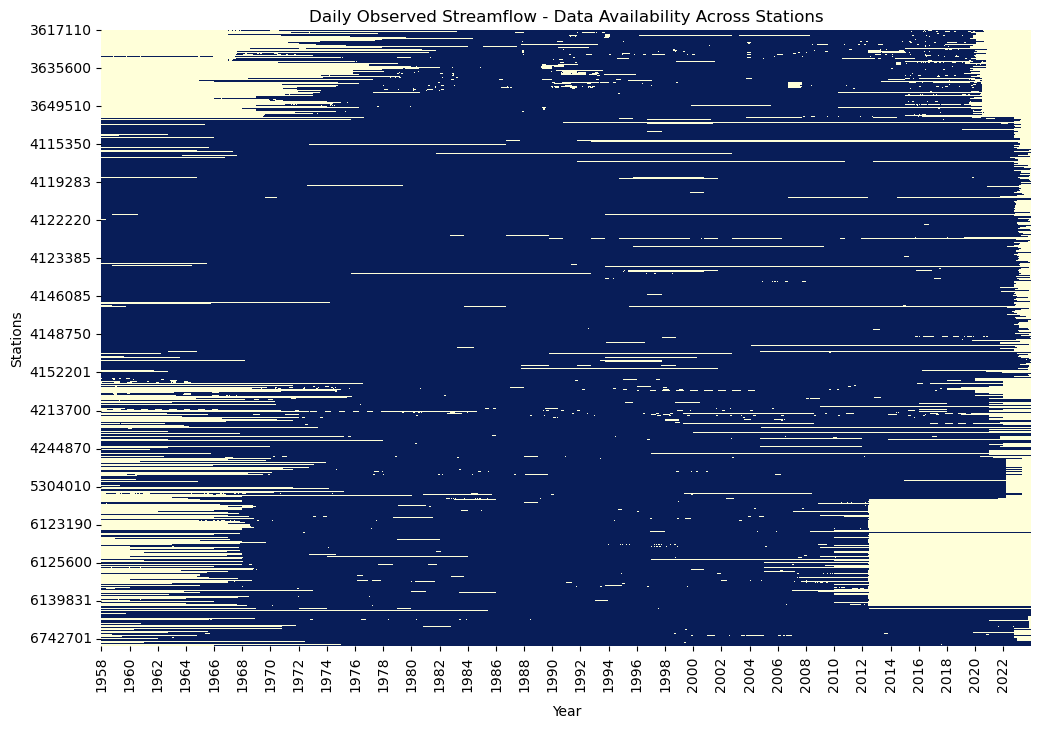

In [3]:
''' Missing Data Heatmap Visualization '''

df_processing = df_cleaned.copy()
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m-%d')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)
dates = df_processing.index

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap on the given axis
sns.heatmap(missing_matrix.T, cmap="YlGnBu", cbar=False, yticklabels=50) # Yellow & blue: cmap="YlGnBu" (lighter = missing, darker = available).

# Set x-ticks to show only the first day of every second year
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=90)  # Rotate for better visibility

# Adjust space between x-tick labels and x-axis label
ax.set_xlabel("Year", labelpad=10)  # Increase labelpad to add more space

# Labels and title
ax.set_ylabel("Stations")
ax.set_title("Daily Observed Streamflow - Data Availability Across Stations")

plt.show()

In [4]:
# Step 1: Identify dates where all stations have data (no NaNs)
complete_days = df_processing.dropna(how="any")  # Drops rows with any missing values

# ✅ If no complete dates exist, stop execution
if complete_days.empty:
    print("No common date range among all stations. Exiting...")

No common date range among all stations. Exiting...


In [5]:
''' Longest continuous period for each individual station where data is fully available '''

# List to store the longest period for each station
longest_periods = []

# Loop through each station (column)
for station in df_processing.columns:
    station_data = df_processing[station].dropna()  # Remove NaNs for the station

    if station_data.empty:
        continue  # Skip stations with no data at all

    # Identify contiguous periods
    groups = (station_data.index.to_series().diff().dt.days != 1).cumsum()  # Find breaks
    grouped_data = station_data.groupby(groups)

    # Get start, end, and number of days for each period
    station_periods = grouped_data.apply(lambda g: pd.Series({
        "StartDate": g.index[0],
        "EndDate": g.index[-1],
        "NumDays": (g.index[-1] - g.index[0]).days + 1
    }))

    # ✅ Ensure station_periods is a DataFrame. Use "unstack(level=1)" to reshape it into a DataFrame:
    station_periods = station_periods.unstack(level=1).reset_index(drop=True)

    # Ensure correct column types
    station_periods["StartDate"] = pd.to_datetime(station_periods["StartDate"])
    station_periods["EndDate"] = pd.to_datetime(station_periods["EndDate"])
    station_periods["NumDays"] = station_periods["NumDays"].astype(int)

    # ✅ Check if "NumDays" column exists
    if not station_periods.empty and station_periods.get("NumDays") is not None:
        longest_idx = station_periods["NumDays"].idxmax()  # Get index of the longest period
        longest_period = station_periods.loc[longest_idx].copy()
        longest_period["Station"] = station  # Add station name
        longest_periods.append(longest_period)

# Convert to DataFrame
longest_periods_df = pd.DataFrame(longest_periods)

# Ensure correct column order if the DataFrame isn't empty
if not longest_periods_df.empty:
    longest_periods_df = longest_periods_df[["Station", "StartDate", "EndDate", "NumDays"]].reset_index(drop=True)

# Show results
longest_periods_df

,Station,StartDate,EndDate,NumDays
0,3617110,1970-08-08,2016-05-27,16730
1,3617811,1983-04-21,2020-01-31,13435
2,3617812,1983-03-22,2010-10-30,10085
3,3617814,1993-10-01,2019-09-30,9496
4,3618051,1977-08-10,2017-04-30,14509
...,...,...,...,...
805,6854601,1961-01-01,1999-04-30,13999
806,6854713,1958-01-01,2020-06-24,22821
807,6855411,1975-01-01,2023-12-31,17897
808,6855412,1975-01-01,2017-08-07,15560


In [10]:
longest_periods_df.describe()

,StartDate,EndDate,NumDays
count,810,810,810.000000
mean,1966-06-11 22:31:06.666666672,2014-10-10 12:49:46.666666496,17653.596296
min,1958-01-01 00:00:00,1978-09-29 00:00:00,2556.000000
25%,1958-01-01 00:00:00,2009-12-30 00:00:00,12915.000000
50%,1960-01-01 00:00:00,2020-06-12 00:00:00,18776.000000
75%,1971-04-01 00:00:00,2023-01-21 00:00:00,23673.000000
max,2009-11-03 00:00:00,2023-12-31 00:00:00,24106.000000
std,NaN,NaN,6065.987670


According to the above results, the longest continuos periods of the stations vary from 7 years to the entire target period, 66 years, with an average of 48 years.

In [ ]:
''' Export the data for the longest continuous periods '''

# All daily continuos data folder
lcd_folder = daily_folder + "//Baseflow//longest_continuous_data"

longest_periods_df.to_csv(lcd_folder + "//longest_continuos_df.csv", index=False) # Save file for possible further analysis

# Ensure output directories exist
if not os.path.exists(lcd_folder):
    os.mkdir(lcd_folder)

# Copy file
shutil.copy(daily_folder + "//Baseflow//file.lst", lcd_folder + "//file.lst")  # Copies master file
shutil.copy(daily_folder + "//Baseflow//baseflow.exe", lcd_folder + "//baseflow.exe")  # Copies executable

# Reading file content
with open(lcd_folder + "//file.lst", "r") as file:
    content = file.readlines()

position = 6
space = "     " 
header = content[:position] # Take the header of the baseflow master file
lines_to_write = []

stations = df_processing.columns.to_list()

for id_station in stations:

    print("Processing station " + id_station)

    # Get the start and end dates of the longest period of each station
    start_date = longest_periods_df[longest_periods_df["Station"] == id_station]["StartDate"].to_list()[0]
    end_date = longest_periods_df[longest_periods_df["Station"] == id_station]["EndDate"].to_list()[0]
 
    # Setting up files for the following baseflow calculation
    temp_df4 = df_processing.loc[start_date:end_date, [id_station]].reset_index()
    temp_df4 = temp_df4[temp_df4[id_station].notnull()] # Remove rows that have NaN values in the specified column only.
    temp_df4[id_station] = temp_df4[id_station].round(2) # Convert to float with two decimals to follow the example file of the baseflow calculation algorithm
    temp_df4 = temp_df4.rename(columns={"YYYY-MM-DD":"Date", id_station:"FlowValue"}) # Rename columns to fit the required format for baseflow calculation
    temp_df4["Date"] = temp_df4["Date"].apply(lambda row:  row.strftime('%Y%m%d')) # There must be no spaces in the date portion (YYYYMMDD) of the line
    temp_df4 = temp_df4.set_index("Date")
    temp_df4.to_csv(lcd_folder + "//" + id_station + ".csv", sep=" ") # Save file using space delimited format for baseflow calculations

    lines_to_write.append(id_station + ".csv" + space + id_station + ".out\n")

new_content = header + lines_to_write

# Writing modified content back
with open(lcd_folder + "//file.lst", "w") as file:
    file.write(''.join(new_content))

Processing station 3617110
Processing station 3617811
Processing station 3617812
Processing station 3617814
Processing station 3618051
Processing station 3618052
Processing station 3618500
Processing station 3618700
Processing station 3618711
Processing station 3618720
Processing station 3618721
Processing station 3618722
Processing station 3618950
Processing station 3618951
Processing station 3621200
Processing station 3623100
Processing station 3625000
Processing station 3626000
Processing station 3627000
Processing station 3628400
Processing station 3628701
Processing station 3628900
Processing station 3629001
Processing station 3630600
Processing station 3631100
Processing station 3632400
Processing station 3633120
Processing station 3633123
Processing station 3633160
Processing station 3633180
Processing station 3633301
Processing station 3634150
Processing station 3634160
Processing station 3634320
Processing station 3634340
Processing station 3634350
Processing station 3634360
P